# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including popularity, budget, revenue, title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year.\
>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


>What can we say about the populraity and revenue of movies and what features realated to them. Let's ask some question help us investigate this data set.
 <ol>
    <li>Which genres are most popular?
    <li>Dose the runtime affect the popularity of the movie?
    <li>Is there a relation between the users vote and the popularity of the movie?
    <li>What kinds of properties are associated with movies that have high revenues?    
 </ol>    

In [1]:
#importing the packages needed to conduct the analysis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

>**Loading** in the data, **Checking** for cleanliness, and then **Trimming** and **Cleaning** the dataset for analysis. 
### General Properties
>**Perform** operations to inspect data

In [2]:
# Load data into a pandas data frame and print out a few lines.
movies_df=pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#dimensions of the data frame
movies_df.shape

(10866, 21)

>The data farme cosists of **(10866 instances)** and **(21 columns)**.

In [4]:
#look for instances of missing data 
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### columns that have missing instances
<ul>
    <li>imdb_id
    <li>cast                                 
    <li>homepage                                            
    <li>director                                                   
    <li>tagline
    <li>keywords
    <li>overview
    <li>genres
    <li>production_companie
</ul>        
        

In [5]:
#look for duplicated instances.
movies_df.duplicated().sum()

1

>There is only **one** duplicated instance in the data set.

In [6]:
#inspect the data type in each column.
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#explore summary statistics for all columns in the data set
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>From the "Minimum" it sounds like the columns "budget", "revenue", "runtime", "buget_adj" and "revenue_adj" have some zero values which does not make sense. 

In [8]:
#look for instances of zero values. 
movies_df[movies_df==0].count()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

>More than half the values of both "budget" and "revenue" are missing which will of course reduce the accuracy of analyzing financial data.
>
>There are 31 instances where the "runtime" is missing.

### Data Cleaning 
#### Drop extraneous columns
>Drop columns that are not relevant to our questions.
>
>imdb_id, homepage, tagline, keywords, overview, production_companies, release_date, budget, and revenue.

In [9]:
#drop columns in place
movies_df.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies','release_date','budget','revenue'], axis=1, inplace=True)
movies_df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Drop Rows with Missing Values

In [15]:
# drop rows with any null values.
movies_df.dropna(inplace=True)

In [16]:
# checks if any of columns have null values.
movies_df.isnull().sum().any()

False

>Now there are not any null values.

#### Dedupe data

In [17]:
# drop duplicates.
movies_df.drop_duplicates(inplace=True)

In [18]:
# print number of duplicates again to confirm dedupe
movies_df.duplicated().sum()

0

>Now there are not any duplicates.

#### Fill the zero values


In [19]:
def replace_zero(column_name):
    '''
        replace the zero values in a given column with the mean value of that column
        arg: column_name
    '''    
    movies_df[column_name]=movies_df[column_name].replace(0,movies_df[column_name].mean())

In [21]:
#Replace the zero values in budget_adj, revenue_adj and runtime with the mean value of each column.
replace_zero('runtime')
replace_zero('budget_adj')
replace_zero('revenue_adj')

In [22]:
# check there are no zero values.
movies_df[movies_df==0].count().sum()

0

>Now there are no zero values.

#### Adjust cast and genres columns
>Convert the data type in both colums to list of strings to be able to apply 'explode' method to facilitate further analysis.

In [24]:
def split(column_name):
    '''
       split the string at '|' into list
       arg: column_name
    '''
    movies_df[column_name]=movies_df[column_name].str.split('|')

In [25]:
#split the 'cast' and 'genres' columns
split('cast')
split('genres')

### Check clean data
>Let's again explore our data to make sure it is clean

In [26]:
#print the dimensions and the first few rows of the data frame.
print(movies_df.shape)
movies_df.head()

(10731, 12)


,id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124.0,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120.0,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119.0,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136.0,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137.0,"[Action, Crime, Thriller]",2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
#explore some informtions of the data frame
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   original_title  10731 non-null  object 
 3   cast            10731 non-null  object 
 4   director        10731 non-null  object 
 5   runtime         10731 non-null  float64
 6   genres          10731 non-null  object 
 7   vote_count      10731 non-null  int64  
 8   vote_average    10731 non-null  float64
 9   release_year    10731 non-null  int64  
 10  budget_adj      10731 non-null  float64
 11  revenue_adj     10731 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.1+ MB


In [28]:
#explore summary statistics for all columns in the data set
movies_df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,65201.741869,0.652615,102.736197,219.812972,5.964710,2001.259622,2.699975e+07,8.054156e+07
std,91470.508056,1.004804,30.040062,578.815324,0.930283,12.820151,3.063617e+07,1.372952e+08
min,5.000000,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10547.500000,0.210765,90.000000,17.000000,5.400000,1995.000000,1.776530e+07,5.200623e+07
50%,20323.000000,0.387081,99.000000,39.000000,6.000000,2006.000000,1.776530e+07,5.200623e+07
75%,73948.500000,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,5.200623e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

>After trimming and cleaning the data, it is ready for exploration. Compute statistics and create visualizations with the goal of addressing the research questions.

### Research Question 1 (Which genres are most popular?)
>First we need to separate genres into row by using pandas method :"explode" to be able to group by genres and explore the average popularity of each genre.

In [31]:
#explode the data frame into new one with a separate row for each genre.
genres_df=movies_df.explode('genres')

In [32]:
#group by genres and explore the mean popularity of each genre.
genres_popularity=genres_df.groupby(['genres']).popularity.mean()
genres_popularity

genres
Action             0.929040
Adventure          1.158480
Animation          0.885913
Comedy             0.594795
Crime              0.745331
Documentary        0.188172
Drama              0.592844
Family             0.794195
Fantasy            1.000166
Foreign            0.191552
History            0.582103
Horror             0.465370
Music              0.495123
Mystery            0.691137
Romance            0.593143
Science Fiction    1.007173
TV Movie           0.272252
Thriller           0.742534
War                0.732346
Western            0.594216
Name: popularity, dtype: float64

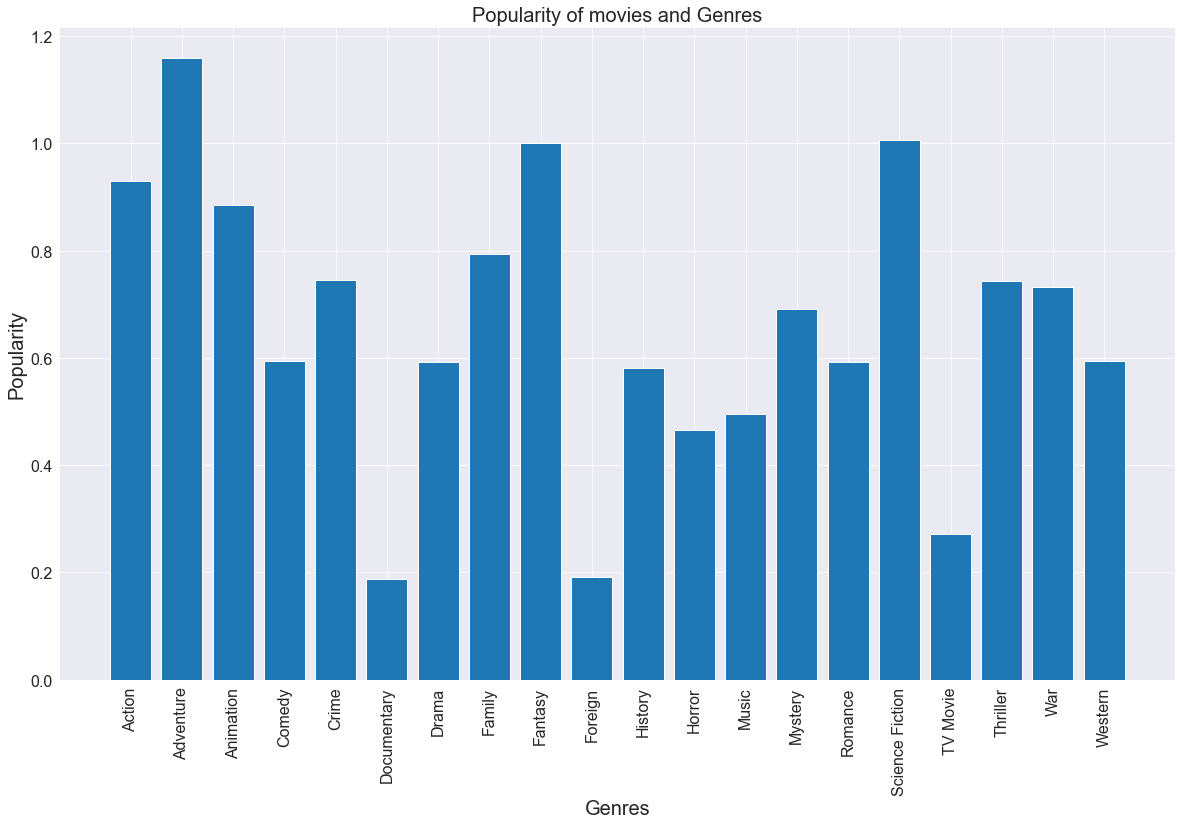

In [33]:
#plot a bar of genres vs popularity.

fig, ax = plt.subplots(figsize=(20,12));
plt.bar(genres_popularity.index, genres_popularity);
plt.ylabel('Popularity', fontsize=20)
plt.xlabel('Genres', fontsize=20)
plt.title('Popularity of movies and Genres', fontsize=20)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);

>It is clear that the most popular genre is "Adventure" followed by "Fantasy" and then "Science Fiction".
>
>Now we will investigate the popularity of this most popular genre"Avdenture" from year to year.

In [34]:
#group adventure movies by year and explore the mean popularity from year to year.
adventure_popularity=genres_df.query('genres=="Adventure"').groupby('release_year').popularity.mean()
adventure_popularity

release_year
1960    0.700981
1961    0.767323
1962    0.942513
1963    0.728487
1964    0.736431
1965    0.581820
1966    0.293593
1967    1.025547
1968    1.109147
1969    0.748933
1970    0.702472
1971    0.646932
1972    0.465044
1973    0.730942
1974    0.465579
1975    0.880297
1976    0.515526
1977    1.407146
1978    0.447605
1979    0.986590
1980    0.788612
1981    0.875815
1982    0.979938
1983    0.900596
1984    0.682884
1985    0.911157
1986    0.798935
1987    0.770060
1988    0.497472
1989    0.910504
1990    0.801768
1991    0.728863
1992    0.935827
1993    0.718552
1994    0.550848
1995    0.724682
1996    0.903394
1997    0.926993
1998    0.873609
1999    1.012306
2000    0.854593
2001    1.106601
2002    1.101468
2003    1.291358
2004    1.100657
2005    1.040306
2006    0.942364
2007    0.853849
2008    1.008385
2009    1.153656
2010    1.378913
2011    1.146888
2012    1.461478
2013    1.294491
2014    2.430526
2015    3.283786
Name: popularity, dtype: float64

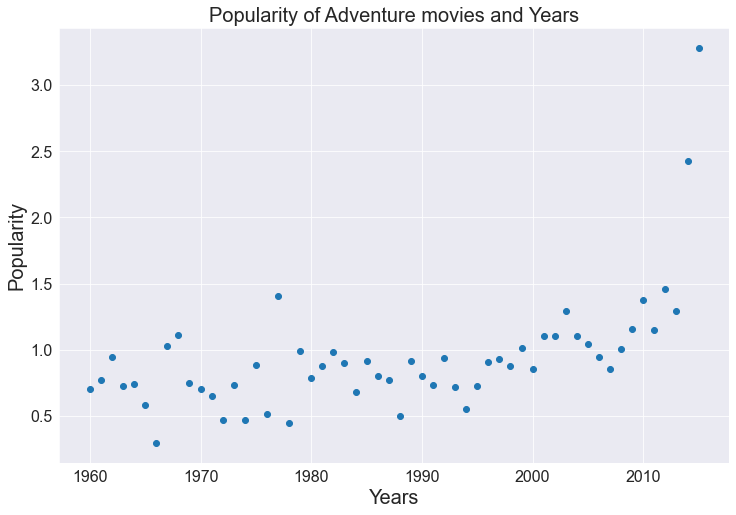

In [35]:
#plot a scatterplot of genres vs popularity.
fig, ax = plt.subplots(figsize=(12,8));
plt.scatter(adventure_popularity.index, adventure_popularity);
plt.ylabel('Popularity', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.title('Popularity of Adventure movies and Years', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

>It seems like there is a slight positive correlation indicating increase in the popularity of adventure movies from year to year

### Research Question 2  (Dose the runtime affect the popularity of the movie?)
>Explore whether there is a relation between the runtime and popularity of the movie. 

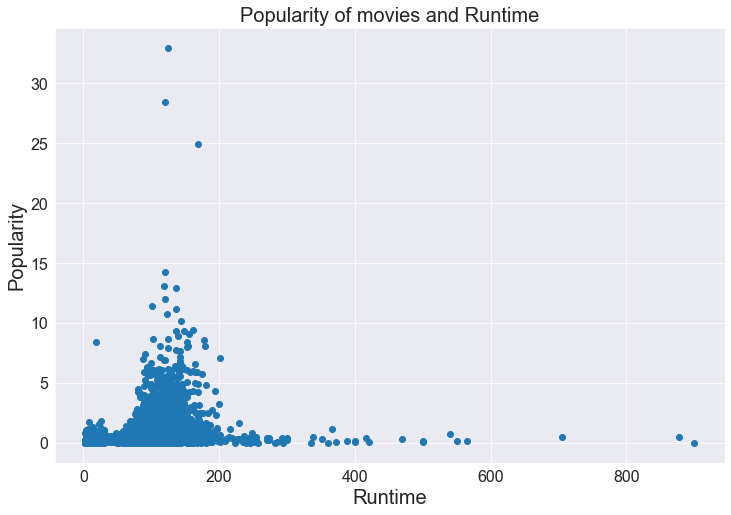

In [36]:
#plot a scatterplot of runtime vs popularity.
fig, ax = plt.subplots(figsize=(12,8));
plt.scatter(movies_df.runtime, movies_df.popularity)
plt.ylabel('Popularity', fontsize=20)
plt.xlabel('Runtime', fontsize=20)
plt.title('Popularity of movies and Runtime', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

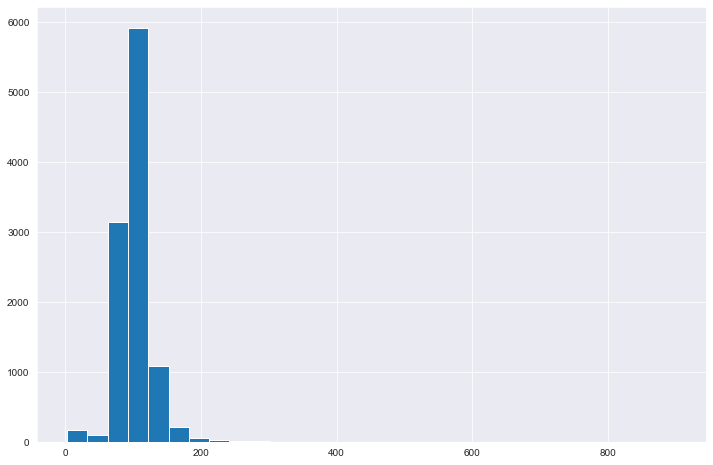

In [37]:
#plotting the histogram of runtime
movies_df.runtime.hist(bins=30, figsize=(12,8));

>It seems like the most popular movies are slightly more than 100 minutes.

### Research Question 3  (Is there a relation between the users vote and the popularity of the movie?)
>Explore whether there is a relation between the vote and popularity of the movie. 


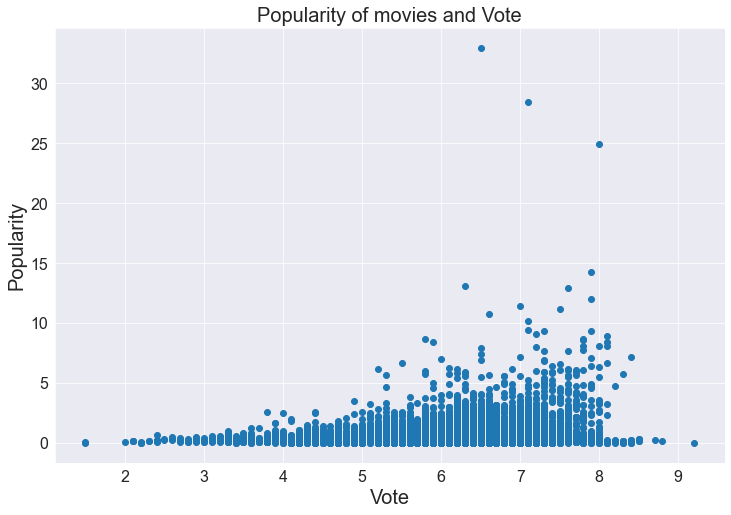

In [38]:
#plot a scatterplot of vote vs popularity.
fig, ax = plt.subplots(figsize=(12,8));
plt.scatter(movies_df.vote_average, movies_df.popularity)
plt.ylabel('Popularity', fontsize=20)
plt.xlabel('Vote', fontsize=20)
plt.title('Popularity of movies and Vote', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

>It seems like there is a positive correlation between the averge vote and popularity of the movie.

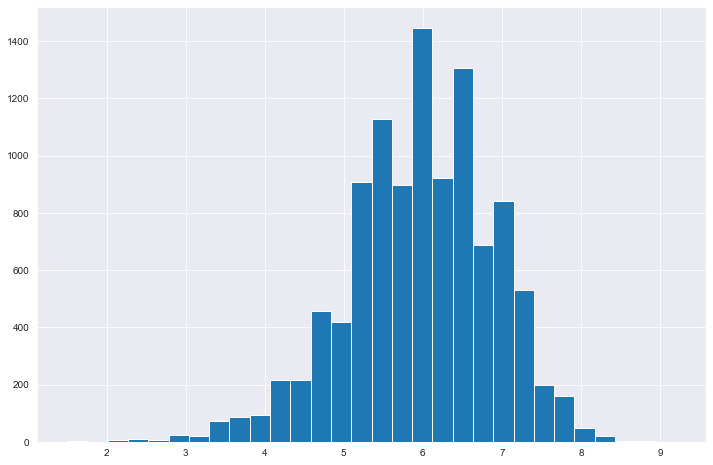

In [39]:
#plotting the histogram of vote_average.
movies_df.vote_average.hist(bins=30, figsize=(12,8));

>The most popular vote is about "6".

### Research Question 4  (What kinds of properties are associated with movies that have high revenues?)
>Explore the features associated with movies that have high revenues.
>We are analyzing financial data based on the last two columns "budget_adj" and "revenue_adj" to take inflation over time in accounting.

#### First: The relation between popularity and revenue
>Explore whether there is a relation between popularity and the revenue of the movie.

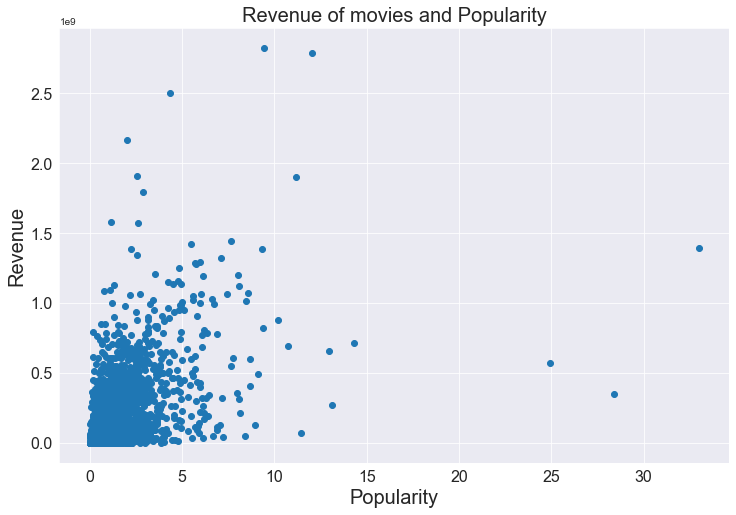

In [40]:
#plot a scatterplot of popularity vs revenue .
fig, ax = plt.subplots(figsize=(12,8));
plt.scatter(movies_df.popularity, movies_df.revenue_adj)
plt.ylabel('Revenue', fontsize=20)
plt.xlabel('Popularity', fontsize=20)
plt.title('Revenue of movies and Popularity', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

>It seems like there is a slight positive correlation between popularity and revenue.

#### second: The relation between Runtime and revenue
>Explore whether there is a relation between runtime and the revenue of the movie.

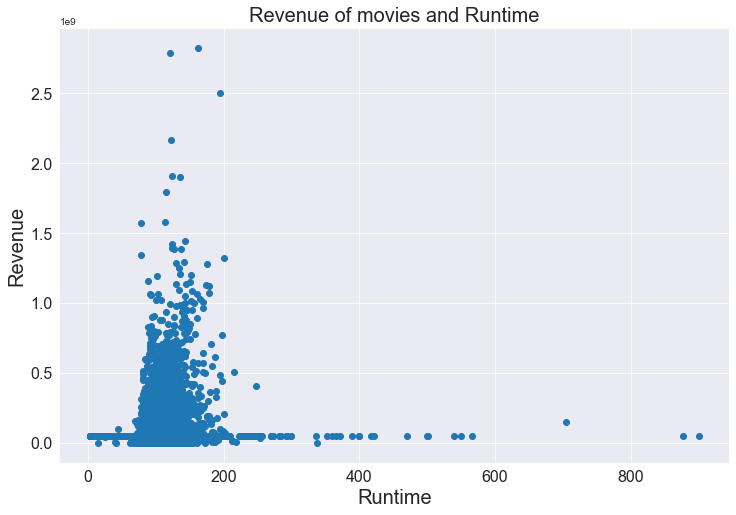

In [41]:
#plot a scatterplot of runtime vs revenue .
fig, ax = plt.subplots(figsize=(12,8));
plt.scatter(movies_df.runtime, movies_df.revenue_adj)
plt.ylabel('Revenue', fontsize=20)
plt.xlabel('Runtime', fontsize=20)
plt.title('Revenue of movies and Runtime', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

>It seems like most of the movies with highest revenue are slightly more than 100 minutes.

#### Third: The relation between vote and revenue
>Explore whether there is a relation between vote and the revenue of the movie.

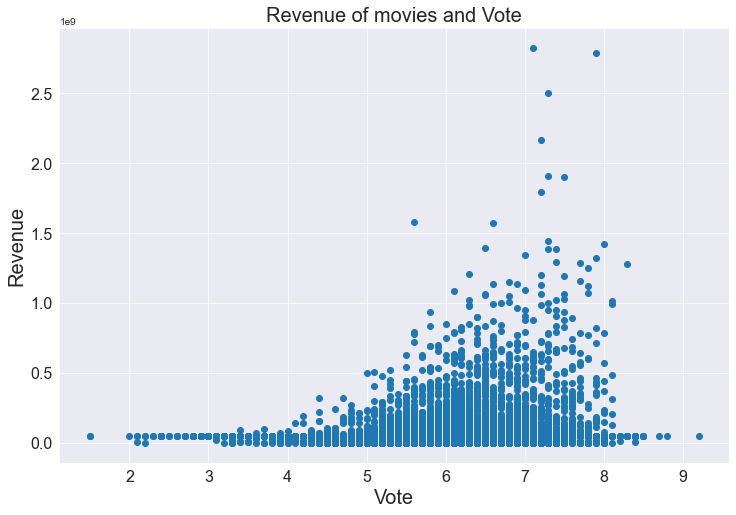

In [42]:
#plot a scatterplot of vote vs revenue .
fig, ax = plt.subplots(figsize=(12,8));
plt.scatter(movies_df.vote_average, movies_df.revenue_adj)
plt.ylabel('Revenue', fontsize=20)
plt.xlabel('Vote', fontsize=20)
plt.title('Revenue of movies and Vote', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

>It seems like there is a positive correlation between the averge vote and revenue of the movie.

#### Forth: The relation between budget and revenue
>Explore whether there is a relation between budget and the revenue of the movie.

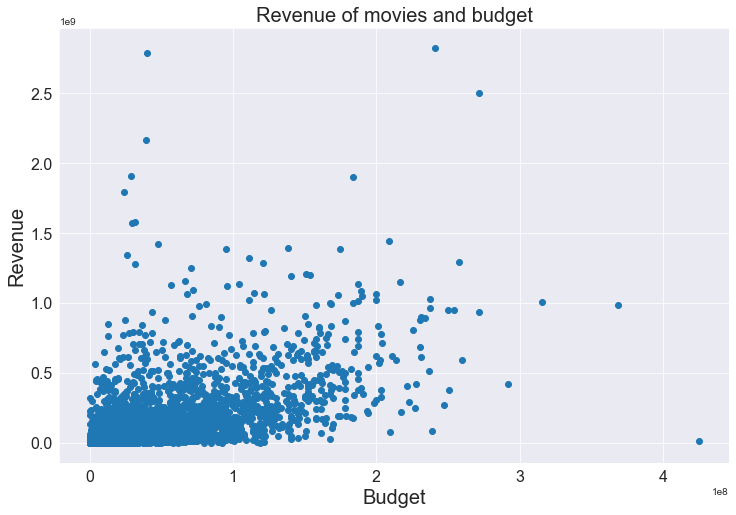

In [43]:
#plot a scatterplot of budget vs revenue .
fig, ax = plt.subplots(figsize=(12,8));
plt.scatter(movies_df.budget_adj, movies_df.revenue_adj)
plt.ylabel('Revenue', fontsize=20)
plt.xlabel('Budget', fontsize=20)
plt.title('Revenue of movies and budget', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

>It seems like there is no clear correlation between budget and revenue.

#### Fifth: The relation between genres and revenue
>Explore whether there is a relation between the genre and the revenue of the movie.

In [44]:
#group the genres data frame we exploded earlier by genres and explore the mean revenue.
genres_revenue=genres_df.groupby('genres').revenue_adj.mean()
genres_revenue

genres
Action             1.164944e+08
Adventure          1.643359e+08
Animation          1.231938e+08
Comedy             7.574428e+07
Crime              7.897215e+07
Documentary        4.369868e+07
Drama              6.765460e+07
Family             1.189953e+08
Fantasy            1.378164e+08
Foreign            4.528948e+07
History            7.642403e+07
Horror             5.827023e+07
Music              7.572895e+07
Mystery            7.663219e+07
Romance            7.363982e+07
Science Fiction    1.145949e+08
TV Movie           5.204563e+07
Thriller           8.190417e+07
War                9.592935e+07
Western            7.777637e+07
Name: revenue_adj, dtype: float64

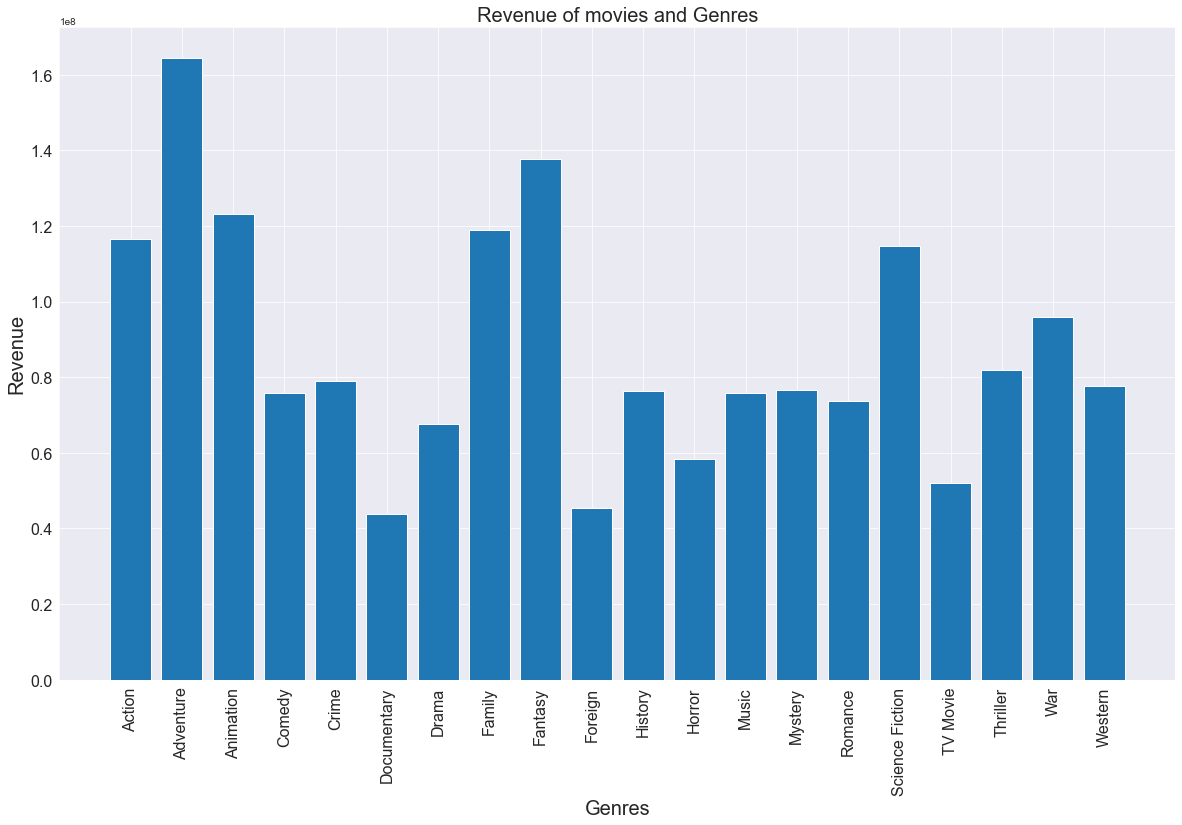

In [45]:
#plot a bar of genres vs revenue.
fig, ax = plt.subplots(figsize=(20,12));
plt.bar(genres_revenue.index, genres_revenue);
plt.ylabel('Revenue', fontsize=20)
plt.xlabel('Genres', fontsize=20)
plt.title('Revenue of movies and Genres', fontsize=20)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);

>It is clear that the genre that makes the highest revenue is "Adventure" followed by "Fantasy" and then "Science Fiction".

<a id='conclusions'></a>
## Conclusions

>After coducting the whole analysis we can conclude the following: 
 <ul>
    <li>"Adventure" is the most common genre of movies achieving the highest revenues.
    <li>Movies of average length of about "100 minutes" are most popular achieving the highest revenues.
    <li>Movies of higher average users vote are more popular whith higher revenues.
    <li>Buget dose not have a great effect on the revenue.  
 </ul>   
